In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import json
import requests
import tweepy
import time
import matplotlib.pyplot as plt
import seaborn as sns
import time
from PIL import Image
import urllib.request

# Gathering data
Twitter archive and image prediction

In [2]:
#loading the twitter archive manully
df_arch_twitt = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df_arch_twitt.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
#donloading prediction file by request
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split("/")[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, mode="wb") as file:
        file.write(response.content)

In [5]:
#reading TSV file by Pandas
df_img_predict = pd.read_csv("image-predictions.tsv", sep="\t")
df_img_predict.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## Twitter  API

In [49]:
consumer_key = '---------------'
consumer_secret = '---------------'
access_token = '---------------'
access_secret = '---------------'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [51]:
exp_twet = api.get_status(df_arch_twitt.tweet_id[1000], tweet_mode = "extended")
content = exp_twet._json
content

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [52]:
content.keys()
content

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [53]:
exp_twet.retweet_count, exp_twet.id, exp_twet.favorite_count

(2080, 747963614829678593, 5647)

In [ ]:
tweet_ids = df_arch_twitt.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile("tweet_json.txt"):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# Reading json file and make dataframe
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df

tweet_id  retweet_count  favorite_count  user_count
0     892420643555336193           7454           35320     8912152
1     892177421306343426           5534           30564     8912152
2     891815181378084864           3660           23002     8912152
3     891689557279858688           7627           38610     8912152
4     891327558926688256           8224           36888     8912152
...                  ...            ...             ...         ...
2325  666049248165822465             39              95     8912160
2326  666044226329800704            124             263     8912160
2327  666033412701032449             39             108     8912160
2328  666029285002620928             41             118     8912160
2329  666020888022790149            447            2357     8912160

[2330 rows x 4 columns]

## Assessment Data


#### assissing tweitter archive dataframe

In [7]:
df_arch_twitt.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [8]:
#Twitter archive overall assess
df_arch_twitt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

as a general look at Twitter archive dataframe we have found missing data in expanded_urls colunms.

Note: the other columns have missing data we are not interest with it like(in_._status_id or in_._user_id)

In [9]:
df_arch_twitt.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/820749716845686786/photo/1,https://twitter.com/dog_rates/status/820749716845686786/photo/1                                                                    2
https://twitter.com/dog_rates/status/673295268553605120/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/841077006473256960/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/669000397445533696/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/781524693396357120/photo/1                                                                                                                                    2
               

from we read the upper results of value_counts() we have found duplicated and we found some rows has two urls seprated by comma

In [10]:
sum(df_arch_twitt.expanded_urls.duplicated())

137

#we have found 137 duplicated appered in expanded_urls column.

In [11]:
## recheach the total datafamre
sum(df_arch_twitt.duplicated())

0

In [12]:
df_arch_twitt.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

so as we see as id_tweet we dont have any duplicat but in columns we have found.

In [13]:
df_arch_twitt.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_arch_twitt.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
df_rn_assess = df_arch_twitt[df_arch_twitt["rating_numerator"] >= 20]
df_rn_assess

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1712  680494726643068929                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
290   2017-03-04 22:12:52 +0000   
313   2017-02-24 21:54:03 +0000   
340   2017-02-16 13:11:49 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1663  2016-01-01 06:22:03 +0000   
1712  2015-12-25 21:06:00 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r

In [16]:
for line in df_rn_assess.text:
    print("\n",line)


 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research

 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10

 @markhoppus 182/10

 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…

 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS

 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the l

founded ilogical rates in rating_numerator column, and after visual assessment of the text of each tweet we found the extracted rates are true. So drop the rows with illogical rate.

#### twitter archive dataframe issues:

##### Quality:

    -duplicated in expanded_urls that means duplicated images, and retweeted tweets.(drop duplicated,remove retweet)
    
    - missing values in expanded_urls rows, every row shoud has image.(drop the empty rows from df)
    
    - some rows in [expanded_urls] column has two url not one
    
    -founded invalied Urls while cleaning from https://vine.co website and delete other url outside twitter
    
    - cleaning tweets not belong to @dog_rates
    
    -The rating_numerator column should of type float and also it should be correctly extracted
    
    -as Visual assessment of Text of  tweets rows with illogical rates more than 20, these already right extracted. The issues in the text.
    
    -rating_denominator values has typos error also. the most rating is 10 but in the data we found 110....
    
##### Tidiness:
    - for our analysis we have more columns will not be useful like[retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id,source]
    
    -classification of dogs(doggo, floofer, pupper, puppo) not good for analysis (untidy).[convert columns one column with value (melt)]

#### assassing image predection dataframe

In [17]:
df_img_predict.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [18]:
#overall cheak
df_img_predict.info()
##no mising data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#cheaking duplicat
sum(df_img_predict.tweet_id.duplicated())
#we predicted that id is different but we will look at the jpg_url

0

In [20]:
sum(df_img_predict.jpg_url.duplicated())
##Boom we have found 66 dupilcated images

66

we have found 66 duplicated so we need to cheak if that ture or false

we will try to find if we have duplicated in other columns.

In [21]:
dup_jpg_predict = df_img_predict["jpg_url"].duplicated(keep=False)
df_dup_jpg_predict = df_img_predict[dup_jpg_predict]
df_dup_jpg_predict.sort_values("jpg_url", inplace = True)
df_dup_jpg_predict.to_csv("duplicatedimage.csv")

<ipython-input-21-3205a57918f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup_jpg_predict.sort_values("jpg_url", inplace = True)


In [22]:
Image("image/1.PNG")

TypeError: 'module' object is not callable

by visual assessment we our predict is true

In [23]:
##cheaking the values in dataframe
for column in df_img_predict:
    print(df_img_predict[column].value_counts())
    print('\n')

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64


https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg    2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg    2
                                                  ..
https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg    1
https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg    1
https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg    1
https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg    1
https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg    1
Name: jpg_url, Length: 2009, dtype: int64


1    1780
2     198
3      66
4      31
Name: img_num, dtype: in

#### image predeciton dataframe issues

##### Quality:

    - duplicated image in jpg_url column.
    - drop rows with False value in p1 to p3, that means photos with False value not containing dogs.
    - not all the text in p1,p2,p3 captilazed.
    - change the the sperated columns by underscore to space
    - the img_num column not showing and ditals and dose not have any meaning.
    
##### Tidiness:

    - after assessing the image predection dataset visualy we found that the first prediction p1 is the most ture predections of types of dogs in photos, so we will remove the the another predictions from dataframe.
    -The data seperated to three table (untidy). merge them in one table

# Cleaning data

#### -Twitter Archive Data Frame
        

In [24]:
##creat a copy to work on it
df_arch_twitt_copy = df_arch_twitt.copy()

In [25]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
df_arch_twitt_copy.shape

(2356, 17)

## Quality issues

<b>Fixing the issue number one</b>

  <b> define:</b> duplicated rows in expanded_urls


In [27]:
sum(df_arch_twitt_copy.expanded_urls.duplicated())

137

###### code

In [28]:
df_arch_twitt_copy.drop_duplicates(subset="expanded_urls",inplace=True)

##### TEST

In [29]:
sum(df_arch_twitt_copy.expanded_urls.duplicated())

0

In [30]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2219 non-null   int64  
 1   in_reply_to_status_id       24 non-null     float64
 2   in_reply_to_user_id         24 non-null     float64
 3   timestamp                   2219 non-null   object 
 4   source                      2219 non-null   object 
 5   text                        2219 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2218 non-null   object 
 10  rating_numerator            2219 non-null   int64  
 11  rating_denominator          2219 non-null   int64  
 12  name                        2219 non-null   object 
 13  doggo                       2219 

In [31]:
df_arch_twitt_copy.shape

(2219, 17)

## Removing retweets rows

In [32]:
len(df_arch_twitt_copy[df_arch_twitt_copy.text.str.startswith("RT")])


182

In [33]:
df_arch_twitt_copy.shape

(2219, 17)

#### CODE

In [34]:
df_arch_twitt_copy = df_arch_twitt_copy[~df_arch_twitt_copy.text.str.contains("RT", na=False)]

#### TesT

In [35]:
len(df_arch_twitt_copy[df_arch_twitt_copy.text.str.startswith("RT")])

0

In [36]:
df_arch_twitt_copy.shape

(2028, 17)



<b>Fixing the issue number two</b>

  <b> define:</b> deletng rows have not image

In [37]:
df_arch_twitt_copy[df_arch_twitt_copy["expanded_urls"].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30  886267009285017600           8.862664e+17         2.281182e+09   

                    timestamp  \
30  2017-07-15 16:51:35 +0000   

                                               source  \
30  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
30  @NonWhiteHat @MayhewMayhem omg hello tanner yo...                  NaN   

    retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
30                       NaN                        NaN           NaN   

    rating_numerator  rating_denominator  name doggo floofer pupper puppo  
30                12                  10  None  None    None   None  None

#### code

In [38]:
df_arch_twitt_copy.drop(30,axis=0,inplace=True)

#### TEST

In [39]:
sum(df_arch_twitt_copy.expanded_urls.isnull())

0

In [40]:
sum(df_arch_twitt_copy.expanded_urls == "")

0

In [41]:
df_arch_twitt_copy.shape

(2027, 17)



<b>Fixing the issue number Three</b>

  <b> define:</b> some rows in expand_url column has two url sperated by comma
  <b> ,Solution:</b> split and clean it

In [42]:
df_arch_twitt_copy.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/707387676719185920/photo/1                                                                    1
https://twitter.com/dog_rates/status/707059547140169728/photo/1,https://twitter.com/dog_rates/status/707059547140169728/photo/1    1
https://twitter.com/dog_rates/status/782598640137187329/photo/1                                                                    1
https://twitter.com/dog_rates/status/697596423848730625/photo/1                                                                    1
https://twitter.com/dog_rates/status/848690551926992896/photo/1                                                                    1
                                                                                                                                  ..
https://twitter.com/dog_rates/status/718939241951195136/photo/1                                                                    1
https://vine.co/v/iHl2UDEBZ95                                        

In [43]:
df_arch_twitt_copy["expanded_urls_clean"] = df_arch_twitt_copy.expanded_urls.str.split(",").str[0]

In [44]:
df_arch_twitt_copy.drop("expanded_urls", axis=1, inplace=True)

In [45]:
df_arch_twitt_copy.rename(columns={"expanded_urls_clean":"expanded_urls"}, inplace=True)

In [46]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2027 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2027 non-null   object 
 4   source                      2027 non-null   object 
 5   text                        2027 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            2027 non-null   int64  
 10  rating_denominator          2027 non-null   int64  
 11  name                        2027 non-null   object 
 12  doggo                       2027 non-null   object 
 13  floofer                     2027 

#### TEST

In [47]:
df_arch_twitt_copy.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/707387676719185920/photo/1    1
https://twitter.com/nbcnews/status/866458718883467265              1
https://twitter.com/dog_rates/status/752917284578922496/photo/1    1
https://twitter.com/dog_rates/status/821107785811234820/photo/1    1
https://twitter.com/dog_rates/status/668221241640230912/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/826598365270007810/photo/1    1
https://twitter.com/dog_rates/status/871032628920680449/photo/1    1
https://twitter.com/dog_rates/status/720043174954147842/photo/1    1
https://twitter.com/dog_rates/status/740359016048689152/photo/1    1
https://twitter.com/dog_rates/status/718246886998687744/photo/1    1
Name: expanded_urls, Length: 2027, dtype: int64

In [48]:
df_arch_twitt_copy.shape

(2027, 17)

In [49]:
sum(df_arch_twitt_copy.tweet_id.duplicated())

0



<b>Fixing the issue number four</b>

  <b> define:</b> founded invalied Urls while cleaning from https://vine.co website

In [50]:
for url in df_arch_twitt_copy.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://gofundme.com/ydvmve-surgery-for-jax
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/vide

https://twitter.com/dog_rates/status/668226093875376128/photo/1
https://twitter.com/dog_rates/status/668221241640230912/photo/1
https://twitter.com/dog_rates/status/668204964695683073/photo/1
https://twitter.com/dog_rates/status/668190681446379520/photo/1
https://twitter.com/dog_rates/status/668171859951755264/photo/1
https://twitter.com/dog_rates/status/668154635664932864/photo/1
https://twitter.com/dog_rates/status/668142349051129856/photo/1
https://twitter.com/dog_rates/status/668113020489474048/photo/1
https://twitter.com/dog_rates/status/667937095915278337/photo/1
https://twitter.com/dog_rates/status/667924896115245057/photo/1
https://twitter.com/dog_rates/status/667915453470232577/photo/1
https://twitter.com/dog_rates/status/667911425562669056/photo/1
https://twitter.com/dog_rates/status/667902449697558528/photo/1
https://twitter.com/dog_rates/status/667886921285246976/photo/1
https://twitter.com/dog_rates/status/667885044254572545/photo/1
https://twitter.com/dog_rates/status/667

In [51]:
### cleaning webiste not twitter
un_wanted_url = ["vine.co","gofundme","blastingnews","petfinder","facebook","http://goo.gl","loveyourmelon.com"]
for url in un_wanted_url:
    df_arch_twitt_copy = df_arch_twitt_copy[~df_arch_twitt_copy.expanded_urls.str.contains(url, na=False)]

In [52]:
df_arch_twitt_copy.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/707387676719185920/photo/1    1
https://twitter.com/dog_rates/status/672466075045466113/photo/1    1
https://twitter.com/dog_rates/status/681610798867845120/photo/1    1
https://twitter.com/dog_rates/status/854732716440526848/photo/1    1
https://twitter.com/dog_rates/status/829374341691346946/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/667437278097252352/photo/1    1
https://twitter.com/dog_rates/status/752660715232722944/photo/1    1
https://twitter.com/dog_rates/status/870308999962521604/photo/1    1
https://twitter.com/dog_rates/status/681320187870711809/photo/1    1
https://twitter.com/dog_rates/status/718246886998687744/photo/1    1
Name: expanded_urls, Length: 1922, dtype: int64

In [53]:
for url in df_arch_twitt_copy.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/670717338665226240/photo/1
https://twitter.com/dog_rates/status/670704688707301377/photo/1
https://twitter.com/dog_rates/status/670691627984359425/photo/1
https://twitter.com/dog_rates/status/670679630144274432/photo/1
https://twitter.com/dog_rates/status/670676092097810432/photo/1
https://twitter.com/dog_rates/status/670668383499735048/photo/1
https://twitter.com/dog_rates/status/670474236058800128/photo/1
https://twitter.com/dog_rates/status/670468609693655041/photo/1
https://twitter.com/dog_rates/status/670465786746662913/photo/1
https://twitter.com/dog_rates/status/670452855871037440/photo/1
https://twitter.com/dog_rates/status/670449342516494336/photo/1
https://twitter.com/dog_rates/status/670444955656130560/photo/1
https://twitter.com/dog_rates/status/670442337873600512/photo/1
https://twitter.com/dog_rates/status/670435821946826752/photo/1
https://twitter.com/dog_rates/status/670434127938719744/photo/1
https://twitter.com/dog_rates/status/670


<b>Fixing the issue number five</b>

  <b> define:</b> cleaning tweets not belong to @dog_rates

#### Code

In [54]:
df_arch_twitt_copy = df_arch_twitt_copy.loc[df_arch_twitt_copy["expanded_urls"].str.contains("https://twitter.com/dog_rates",na=False)]

#### TEST

In [55]:
for url in df_arch_twitt_copy.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

In [56]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1892 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1892 non-null   object 
 4   source                      1892 non-null   object 
 5   text                        1892 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            1892 non-null   int64  
 10  rating_denominator          1892 non-null   int64  
 11  name                        1892 non-null   object 
 12  doggo                       1892 non-null   object 
 13  floofer                     1892 


<b>Fixing the issue number six</b>

  <b> define:</b> The rating_numerator column should of type float and also it should be correctly extracted.
  
  <b> Solution:</b> find decimal ratings and extarct and replace with old one. 

In [57]:
## convert 'rating_numerator', 'rating_denominator' to float
df_arch_twitt_copy[['rating_numerator', 'rating_denominator']] = df_arch_twitt_copy[['rating_numerator','rating_denominator']].astype(float)
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1892 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1892 non-null   object 
 4   source                      1892 non-null   object 
 5   text                        1892 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            1892 non-null   float64
 10  rating_denominator          1892 non-null   float64
 11  name                        1892 non-null   object 
 12  doggo                       1892 non-null   object 
 13  floofer                     1892 

In [58]:
df_arch_twitt_copy[df_arch_twitt_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]

C:\Users\abdul\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


tweet_id                                               text  \
45    883482846933004288  This is Bella. She hopes her smile made you sm...   
763   778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   
1712  680494726643068929  Here we have uncovered an entire battalion of ...   

      rating_numerator  
45                 5.0  
763               27.0  
1712              26.0

In [59]:
df_arch_twitt_copy["text"][45],df_arch_twitt_copy["text"][763],df_arch_twitt_copy["text"][1712]

('This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD')

##### CODE

In [60]:
df_arch_twitt_copy.loc[(df_arch_twitt_copy.tweet_id == 883482846933004288), "rating_numerator"] = 13.50
df_arch_twitt_copy.loc[(df_arch_twitt_copy.tweet_id == 778027034220126208), "rating_numerator"] = 11.27
df_arch_twitt_copy.loc[(df_arch_twitt_copy.tweet_id == 680494726643068929), "rating_numerator"] = 11.26

##### TEST

In [61]:
df_arch_twitt_copy[df_arch_twitt_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]

C:\Users\abdul\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


tweet_id                                               text  \
45    883482846933004288  This is Bella. She hopes her smile made you sm...   
763   778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   
1712  680494726643068929  Here we have uncovered an entire battalion of ...   

      rating_numerator  
45               13.50  
763              11.27  
1712             11.26

<b>Fixing the issue number seven</b>

  <b> define:</b> as Visual assessment of Text of  tweets rows with illogical rates more than 20, these already right extracted. The issues in the text.

###### code for rating_numerator column

In [62]:
df_arch_twitt_copy = df_arch_twitt_copy[(df_arch_twitt_copy["rating_numerator"] <15)&
                                        (df_arch_twitt_copy["rating_numerator"] >1)]

#### TEST

In [63]:
df_arch_twitt_copy.rating_numerator.value_counts()

12.00    415
10.00    405
11.00    379
13.00    238
9.00     149
8.00      91
7.00      51
5.00      32
6.00      32
14.00     32
3.00      19
4.00      16
2.00       9
11.27      1
11.26      1
13.50      1
Name: rating_numerator, dtype: int64

#### code for rating_dnumerator column

In [64]:
df_arch_twitt_copy.rating_denominator.value_counts()

10.0    1869
11.0       1
20.0       1
Name: rating_denominator, dtype: int64

In [65]:
df_arch_twitt_copy[df_arch_twitt_copy["rating_denominator"] == 11.0]["tweet_id"]

1662    682962037429899265
Name: tweet_id, dtype: int64

In [66]:
df_arch_twitt_copy[df_arch_twitt_copy["rating_denominator"] == 20.0]["tweet_id"]

1165    722974582966214656
Name: tweet_id, dtype: int64

In [67]:
df_arch_twitt_copy.loc[(df_arch_twitt_copy.tweet_id == 682962037429899265), "rating_denominator"] = 10.0
df_arch_twitt_copy.loc[(df_arch_twitt_copy.tweet_id == 722974582966214656), "rating_denominator"] = 10.0

#### TEST

In [68]:
df_arch_twitt_copy.rating_denominator.value_counts()

10.0    1871
Name: rating_denominator, dtype: int64

In [69]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1871 non-null   int64  
 1   in_reply_to_status_id       21 non-null     float64
 2   in_reply_to_user_id         21 non-null     float64
 3   timestamp                   1871 non-null   object 
 4   source                      1871 non-null   object 
 5   text                        1871 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            1871 non-null   float64
 10  rating_denominator          1871 non-null   float64
 11  name                        1871 non-null   object 
 12  doggo                       1871 non-null   object 
 13  floofer                     1871 

#### Fixing Quality Issue 

<b>Fixing the issue number 8</b>

  <b> define:</b> Changing the issue of ratings to proper extraction of ratings.

In [70]:
df_arch_twitt_copy["Fractions"] = df_arch_twitt_copy["rating_numerator"] / df_arch_twitt_copy["rating_denominator"]

## Tidiness Issues


<b>Tidiness issue number one</b>

  <b> define:</b> drop columns not useful in our analysis

In [71]:
df_arch_twitt_copy

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  rating_numerator  \
0                          NaN                        NaN              13.0   
1                          NaN                        NaN              13.0   
2                          NaN                        NaN              12.0   
3                          NaN                        NaN              13.0   
4                          NaN                        NaN              12.0   
...                        ...                        ...               ...   
2351                       NaN                        NaN               5.0   
2352                       NaN                        NaN               6.0   
2353                       NaN                        NaN               9.0   
2354                       NaN                        NaN               7.0   
2355                       NaN                        NaN               8.0   

      rating_denominator      name doggo floofer pupper puppo  \
0                   10.0   Phineas  None    No

will be deleted columns [retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,in_reply_to_status_id,in_reply_to_user_id,source]

#### we have removed the retweet rows in (removal retweet) here we just remove the column

In [72]:
columns_will_dropped = ["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","name","in_reply_to_status_id","in_reply_to_user_id","source"]
df_arch_twitt_copy.drop(columns_will_dropped, axis = 1, inplace=True)

In [73]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1871 non-null   int64  
 1   timestamp           1871 non-null   object 
 2   text                1871 non-null   object 
 3   rating_numerator    1871 non-null   float64
 4   rating_denominator  1871 non-null   float64
 5   doggo               1871 non-null   object 
 6   floofer             1871 non-null   object 
 7   pupper              1871 non-null   object 
 8   puppo               1871 non-null   object 
 9   expanded_urls       1871 non-null   object 
 10  Fractions           1871 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 175.4+ KB


In [74]:
df_arch_twitt_copy.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   

   rating_denominator doggo floofer pupper puppo  \
0                10.0  None    None   None  None   
1                10.0  None    None   None  None   
2                10.0  None    None   None  None   
3                10.0  None    None   None  None   
4                10.0  None    None   None  None   

                                       expanded_urls  Fractions  
0  https://twitter.com/dog_rates/status/892420643...        1.3  
1  https://twitter.com/dog_rates/status/892177421...        1.3  
2  https://twitter.com/dog_rates/status/891815181...        1.2  
3  https://twitter.com/dog_rates/status/891689557...        1.3  
4  https://twitter.com/dog_rates/status/891327558...        1.2


<b>Tidiness issue number two</b>

  <b> define:</b> classification of dogs(doggo, floofer, pupper, puppo) not good for analysis (untidy). Convert columns one column with value (melt)
  
 <b> NOTE:</b> Dont forget to remove duplicaed from (melt)

In [82]:
df_arch_twitt_copy.shape

(1871, 8)

##### CODE

In [76]:
df_arch_twitt_copy = pd.melt(df_arch_twitt_copy, id_vars=["tweet_id","timestamp","text","rating_numerator" ,"rating_denominator","expanded_urls","Fractions"],
        var_name="catagory",value_name="dog_stage")

In [77]:
df_arch_twitt_copy = df_arch_twitt_copy.drop('catagory', 1)

In [78]:
df_arch_twitt_copy.shape

(7484, 8)

In [79]:
df_arch_twitt_copy = df_arch_twitt_copy.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

#### TEST

In [83]:
df_arch_twitt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871 entries, 1798 to 5747
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1871 non-null   int64  
 1   timestamp           1871 non-null   object 
 2   text                1871 non-null   object 
 3   rating_numerator    1871 non-null   float64
 4   rating_denominator  1871 non-null   float64
 5   expanded_urls       1871 non-null   object 
 6   Fractions           1871 non-null   float64
 7   dog_stage           1871 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 131.6+ KB


In [84]:
df_arch_twitt_copy.dog_stage.value_counts()

None       1587
pupper      200
doggo        56
puppo        20
floofer       8
Name: dog_stage, dtype: int64

###  Cleaning Image Predictions DataFrame

In [85]:
# creating copy of data
df_img_predict_copy = df_img_predict

In [86]:
df_img_predict_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
df_img_predict_copy.sample(10)

tweet_id                                            jpg_url  \
1667  812781120811126785    https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg   
1986  872486979161796608    https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg   
851   695794761660297217    https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg   
619   680440374763077632  https://pbs.twimg.com/ext_tw_video_thumb/68044...   
479   675349384339542016    https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg   
308   671536543010570240    https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg   
1181  738184450748633089    https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg   
1755  824796380199809024    https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg   
1459  778027034220126208    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg   
1178  737826014890496000    https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg   

      img_num                  p1   p1_conf  p1_dog                   p2  \
1667        1        bull_mastiff  0.989316    True                boxer   
1986        1            Pembroke  0.931861    True             Cardigan   
851         1             Samoyed  0.962139    True           Arctic_fox   
619         1        space_heater  0.920367   False             radiator   
479         3              borzoi  0.866367    True               Saluki   
308         1                 pug  0.537652    True         bull_mastiff   
1181        1  Bedlington_terrier  0.289471    True      standard_poodle   
1755        2            gas_pump  0.676439   False            harvester   
1459        1             clumber  0.946718    True       cocker_spaniel   
1178        1              vizsla  0.990391    True  Rhodesian_ridgeback   

       p2_conf  p2_dog                        p3   p3_conf  p3_dog  
1667  0.007043    True            French_bulldog  0.001740    True  
1986  0.037721    True                 Chihuahua  0.011967    True  
851   0.030553   False                white_wolf  0.001482   False  
619   0.049933   False              electric_fan  0.006719   False  
479   0.122079    True           Irish_wolfhound  0.004020    True  
308   0.220617    True            French_bulldog  0.068297    True  
1181  0.173685    True            Great_Pyrenees  0.157081    True  
1755  0.049995   False                     swing  0.044660   False  
1459  0.015950    True                     Lhasa  0.006519    True  
1178  0.005605    True  Chesapeake_Bay_retriever  0.002869    True

## Fixing Quality issues


<b>Fixing the issue number one</b>

  <b> define:</b> remove duplicated in image

#### code

In [88]:
sum(df_img_predict_copy.jpg_url.duplicated())

66

In [89]:
df_img_predict_copy.drop_duplicates(subset="jpg_url", inplace=True)

#### TEST

In [90]:
sum(df_img_predict_copy.jpg_url.duplicated())

0


<b>Fixing the issue number two</b>

  <b> define:</b> delete photos that not contains dogs

#### code

In [91]:
df_img_predict_copy = df_img_predict_copy[(df_img_predict_copy['p1_dog'] == True) & 
                                    (df_img_predict_copy['p2_dog'] == True) &
                                    (df_img_predict_copy['p3_dog'] == True)]

#### TEST

In [92]:
df_img_predict_copy.shape

(1206, 12)

In [93]:
##test to cheak that all columns just have Ture
for column in ["p1_dog","p2_dog","p3_dog"]:
    print(df_img_predict_copy[column].value_counts())

True    1206
Name: p1_dog, dtype: int64
True    1206
Name: p2_dog, dtype: int64
True    1206
Name: p3_dog, dtype: int64



<b>Fixing the issue number three</b>

  <b> define:</b> not all the text in p1,p2,p3 captilazed

#### CODE

In [94]:
columns =  ["p1", "p2", "p3"]
for column in columns:
    df_img_predict_copy[column] = df_img_predict_copy[column].str.title()

<ipython-input-94-b466bbb55b14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img_predict_copy[column] = df_img_predict_copy[column].str.title()


#### TEST

In [95]:
df_img_predict_copy.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_Springer_Spaniel  0.465074    True              Collie   
1        1                 Redbone  0.506826    True  Miniature_Pinscher   
2        1         German_Shepherd  0.596461    True            Malinois   
3        1     Rhodesian_Ridgeback  0.408143    True             Redbone   
4        1      Miniature_Pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_Sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_Ridgeback  0.072010    True  
2  0.138584    True           Bloodhound  0.116197    True  
3  0.360687    True   Miniature_Pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True


<b>Fixing the issue number four</b>

  <b> define:</b> change the the sperated columns by underscore to space

#### CODE

In [96]:
columns =  ["p1", "p2", "p3"]
for column in columns:
    df_img_predict_copy[column].replace('_', ' ', inplace=True, regex=True)

C:\Users\abdul\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### TEST

In [97]:
df_img_predict_copy

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2066  890609185150312448  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh Springer Spaniel  0.465074    True              Collie   
1           1                 Redbone  0.506826    True  Miniature Pinscher   
2           1         German Shepherd  0.596461    True            Malinois   
3           1     Rhodesian Ridgeback  0.408143    True             Redbone   
4           1      Miniature Pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2066        1           Irish Terrier  0.487574    True        Irish Setter   
2067        2              Pomeranian  0.566142    True          Eskimo Dog   
2070        2                  Basset  0.555712    True    English Springer   
2072        1               Chihuahua  0.716012    True            Malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland Sheepdog  0.061428    True  
1     0.074192    True          Rhodesian Ridgeback  0.072010    True  
2     0.138584    True                   Bloodhound  0.116197    True  
3     0.360687    True           Miniature Pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2066  0.193054    True     Chesapeake Bay Retriever  0.118184    True  
2067  0.178406    True                     Pembroke  0.076507    True  
2070  0.225770    True  German Short-Haired Pointer  0.175219    True  
2072  0.078253    True                       Kelpie  0.031379    True  
2073  0.090647    True                     Papillon  0.068957    True  

[1206 rows x 12 columns]


<b>Fixing the issue number five</b>

  <b> define:</b> drop img_num that not giving any sense to analysis

#### CODE

In [98]:
df_img_predict_copy.drop("img_num", axis = 1, inplace=True)

C:\Users\abdul\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### TEST

In [99]:
df_img_predict_copy.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh Springer Spaniel  0.465074    True              Collie  0.156665   
1                 Redbone  0.506826    True  Miniature Pinscher  0.074192   
2         German Shepherd  0.596461    True            Malinois  0.138584   
3     Rhodesian Ridgeback  0.408143    True             Redbone  0.360687   
4      Miniature Pinscher  0.560311    True          Rottweiler  0.243682   

   p2_dog                   p3   p3_conf  p3_dog  
0    True    Shetland Sheepdog  0.061428    True  
1    True  Rhodesian Ridgeback  0.072010    True  
2    True           Bloodhound  0.116197    True  
3    True   Miniature Pinscher  0.222752    True  
4    True             Doberman  0.154629    True

## Fixing Tidness issues


<b>Fixing the issue number one(optional)</b>

  <b> define:</b> drop not useful predections columns [p2 	p2_conf 	p2_dog 	p3 	p3_conf 	p3_dog]

In [100]:
drop_p = ["p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"]
df_img_predict_copy.drop(drop_p, axis = 1, inplace=True)

C:\Users\abdul\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [101]:
df_img_predict_copy

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2066  890609185150312448  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

                          p1   p1_conf  p1_dog  
0     Welsh Springer Spaniel  0.465074    True  
1                    Redbone  0.506826    True  
2            German Shepherd  0.596461    True  
3        Rhodesian Ridgeback  0.408143    True  
4         Miniature Pinscher  0.560311    True  
...                      ...       ...     ...  
2066           Irish Terrier  0.487574    True  
2067              Pomeranian  0.566142    True  
2070                  Basset  0.555712    True  
2072               Chihuahua  0.716012    True  
2073               Chihuahua  0.323581    True  

[1206 rows x 5 columns]

#### change the names of columns p1,p1_conf 	p1_dog to be more tidy data

In [102]:
df_img_predict_copy.rename(columns={"p1":"predected_dog","p1_conf":"prediction_conf","p1_dog":"result"},
                          inplace=True)

C:\Users\abdul\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [103]:
df_img_predict_copy

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2066  890609185150312448  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

               predected_dog  prediction_conf  result  
0     Welsh Springer Spaniel         0.465074    True  
1                    Redbone         0.506826    True  
2            German Shepherd         0.596461    True  
3        Rhodesian Ridgeback         0.408143    True  
4         Miniature Pinscher         0.560311    True  
...                      ...              ...     ...  
2066           Irish Terrier         0.487574    True  
2067              Pomeranian         0.566142    True  
2070                  Basset         0.555712    True  
2072               Chihuahua         0.716012    True  
2073               Chihuahua         0.323581    True  

[1206 rows x 5 columns]


<b>Fixing the issue number two</b>

  <b> define:</b> merge all tables in one tale

In [104]:
df_twitter_comb = df_arch_twitt_copy.copy()

In [105]:
df_twitter_comb = df_twitter_comb.merge(api_df, on="tweet_id", how="inner")

In [106]:
df_twitter_comb = df_twitter_comb.merge(df_img_predict_copy,on="tweet_id", how="inner")

In [107]:
df_twitter_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1121
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1122 non-null   int64  
 1   timestamp           1122 non-null   object 
 2   text                1122 non-null   object 
 3   rating_numerator    1122 non-null   float64
 4   rating_denominator  1122 non-null   float64
 5   expanded_urls       1122 non-null   object 
 6   Fractions           1122 non-null   float64
 7   dog_stage           1122 non-null   object 
 8   retweet_count       1122 non-null   int64  
 9   favorite_count      1122 non-null   int64  
 10  user_count          1122 non-null   int64  
 11  jpg_url             1122 non-null   object 
 12  predected_dog       1122 non-null   object 
 13  prediction_conf     1122 non-null   float64
 14  result              1122 non-null   bool   
dtypes: bool(1), float64(4), int64(4), object(6)
memory usag

In [108]:
df_arch_twitt_copy.dog_stage.value_counts()

None       1587
pupper      200
doggo        56
puppo        20
floofer       8
Name: dog_stage, dtype: int64

# Storing Cleaned Data

In [109]:
df_arch_twitt_copy.to_csv("Cleaned_data/twitter_archive_master.csv", header=True, index=False)

In [110]:
df_img_predict_copy.to_csv("Cleaned_data/image_predection_master.csv", header=True, index=False)

In [111]:
df_twitter_comb.to_csv("Cleaned_data/combained_df_master.csv", header=True, index=False)

# Analysis

#### we have made our ready dataframe
    -[df_analysis]

In [112]:
df_analysis = df_twitter_comb.copy()

In [113]:
df_analysis.sample(2)

tweet_id                  timestamp  \
52   666447344410484738  2015-11-17 02:46:43 +0000   
817  740359016048689152  2016-06-08 01:45:19 +0000   

                                                  text  rating_numerator  \
52   This is Scout. She is a black Downton Abbey. I...               9.0   
817  This is Chase. He's in a predicament. 9/10 hel...               9.0   

     rating_denominator                                      expanded_urls  \
52                 10.0  https://twitter.com/dog_rates/status/666447344...   
817                10.0  https://twitter.com/dog_rates/status/740359016...   

     Fractions dog_stage  retweet_count  favorite_count  user_count  \
52         0.9      None             18              94     8912160   
817        0.9      None            836            3204     8912153   

                                             jpg_url           predected_dog  \
52   https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg  Curly-Coated Retriever   
817  https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg        Golden Retriever   

     prediction_conf  result  
52          0.322084    True  
817         0.863687    True

##### What the highest and lowest rated dogs on average?

In [114]:
answer1 = df_analysis.groupby(['predected_dog']).mean()['Fractions']
answer1.sort_values(ascending = False).head(10)

predected_dog
Briard                 1.250000
Saluki                 1.233333
Irish Setter           1.233333
Tibetan Mastiff        1.225000
Border Terrier         1.216667
Giant Schnauzer        1.200000
Silky Terrier          1.200000
Standard Schnauzer     1.200000
Irish Water Spaniel    1.200000
Samoyed                1.173913
Name: Fractions, dtype: float64

In [115]:
answer1.sort_values().head(10)

predected_dog
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Boston Bull                    0.866667
Norwich Terrier                0.866667
Walker Hound                   0.875000
Soft-Coated Wheaten Terrier    0.877778
Ibizan Hound                   0.900000
Welsh Springer Spaniel         0.900000
Appenzeller                    0.900000
Scotch Terrier                 0.900000
Name: Fractions, dtype: float64

<b>Insight:</b>The highest rated dog is Briard and the second one is Saluki, from the table that shows the average of rates belong to dogs are approximate rates. So, between the highest ten dog the avenger is very small. In the other hand lowest rated dogs, the average between the lowest one with other is very remarkable (Japanese Spaniel).

##### what is the highest  and lowest favorite dog image ?

In [116]:
df_analysis[df_analysis["favorite_count"] == df_analysis.favorite_count.max()]

tweet_id                  timestamp  \
1108  822872901745569793  2017-01-21 18:26:02 +0000   

                                                   text  rating_numerator  \
1108  Here's a super supportive puppo participating ...              13.0   

      rating_denominator                                      expanded_urls  \
1108                10.0  https://twitter.com/dog_rates/status/822872901...   

      Fractions dog_stage  retweet_count  favorite_count  user_count  \
1108        1.3     puppo          42370          129800     8912153   

                                              jpg_url     predected_dog  \
1108  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg  Lakeland Terrier   

      prediction_conf  result  
1108         0.196015    True

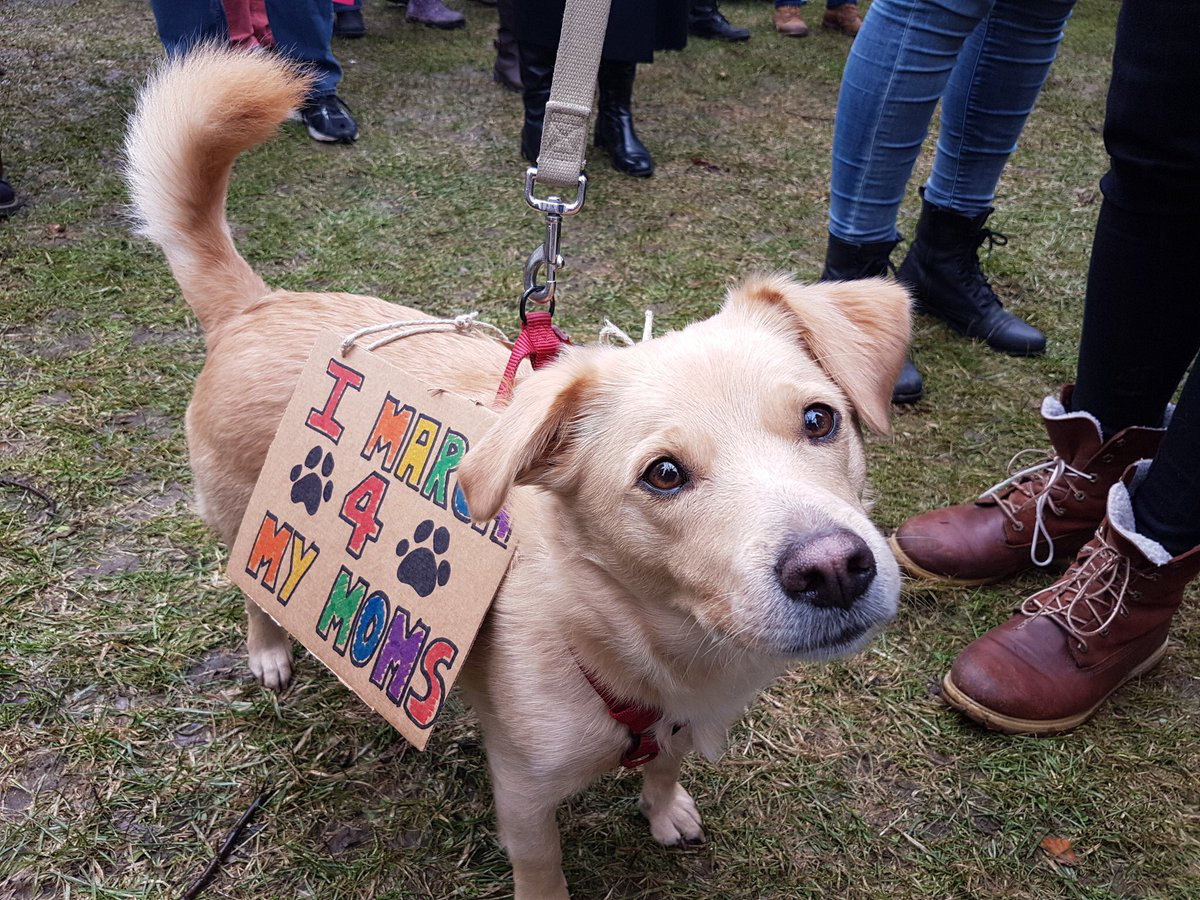

In [117]:
URL = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'
with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())
Image.open('temp.jpg')

In [118]:
df_analysis[df_analysis["favorite_count"] == df_analysis.favorite_count.min()]

tweet_id                  timestamp  \
41  666102155909144576  2015-11-16 03:55:04 +0000   

                                                 text  rating_numerator  \
41  Oh my. Here you are seeing an Adobe Setter giv...              11.0   

    rating_denominator                                      expanded_urls  \
41                10.0  https://twitter.com/dog_rates/status/666102155...   

    Fractions dog_stage  retweet_count  favorite_count  user_count  \
41        1.1      None             11              69     8912160   

                                            jpg_url   predected_dog  \
41  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg  English Setter   

    prediction_conf  result  
41         0.298617    True

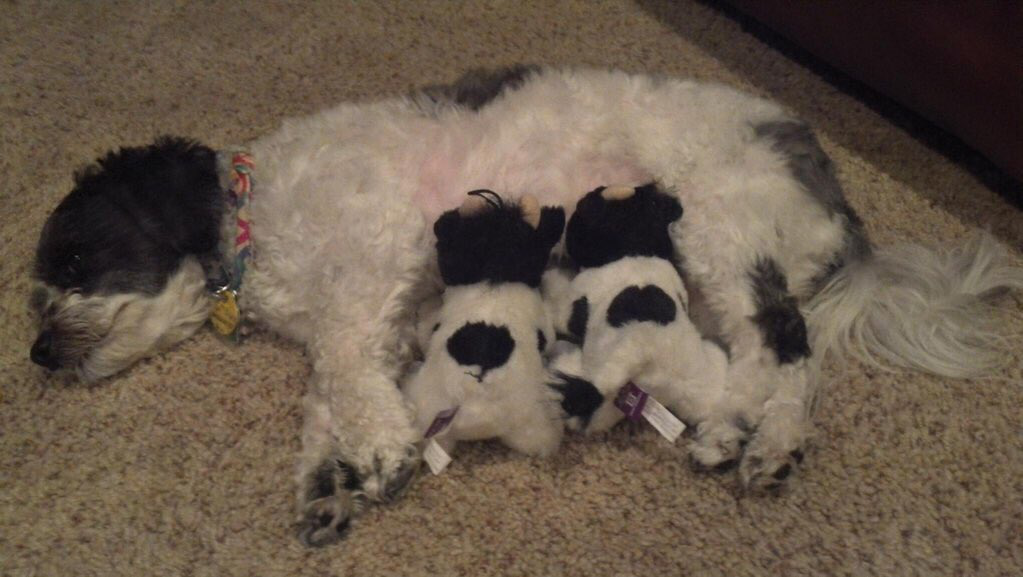

In [119]:
URL = 'https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg'
with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())
Image.open('temp.jpg')

<b>Insight:</b> the highst favorit photo has 129800 favourit and 42370 retweet,the lowest one has 69 favourit and 11 retweet.
So we can expect that the photos with high favorite will be with high retweet.


##### what is the most catagory type of dog ?

In [120]:
answer3 = df_analysis

In [121]:
index = answer3[answer3["dog_stage"] == "None"].index

In [122]:
answer3.drop(index,inplace=True)

In [123]:
answer3.dog_stage.value_counts()

pupper     119
doggo       33
puppo       17
floofer      7
Name: dog_stage, dtype: int64

<b>Insight:</b> the most popular dog stage is pupper, after that doggo, puppo in the last floofer. But we have to say our data have a big miss data about dog stage we have 1587 dog without data about dog stage from data frame.

#####  What are the 10 most frequent predicted dog ?

In [124]:
v_analysis = df_analysis['predected_dog'].value_counts().sort_values(ascending=False)[:10]

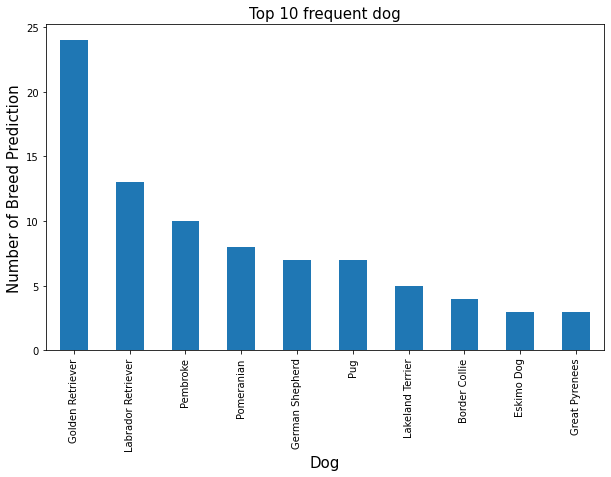

In [120]:
v_analysis.plot(kind = 'bar',figsize=(10,6))
plt.ylabel('Number of Breed Prediction',size=15)
plt.title('Top 10 frequent dog', size=15)
plt.xlabel('Dog',size=15)
plt.savefig('most_frequent');

<b>Insight:</b> from the visualization we have found that the most frequent predicted dog is Golden Retriever, and on other hand the lowest predicted dog is Toy Poodle.